mean1=39.763736, mean2=44.153846
variance1=49.213410, variance2=48.789518


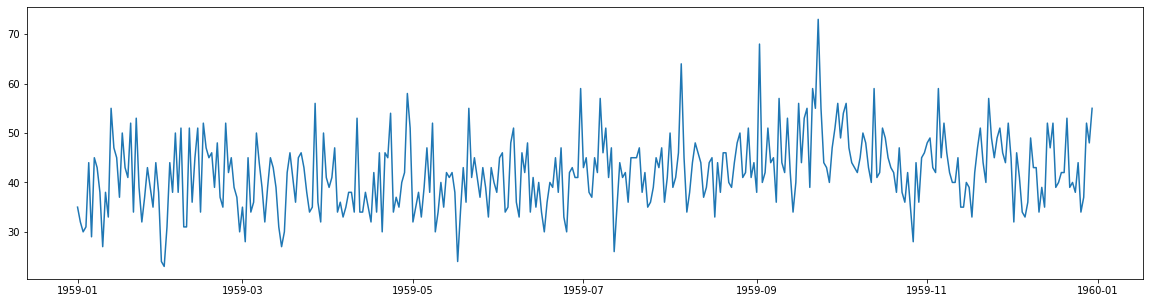

In [12]:
# Daily births dataset -- Stationary

import pandas as pd
import numpy as np
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

data = pd.read_csv('daily_Female_Births_Dataset.csv')

data['Date']=pd.to_datetime(data['Date'])

X= data.set_index('Date').values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

plt.figure(figsize=(20,5))

plt.plot(data['Date'],data['Births'])



mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


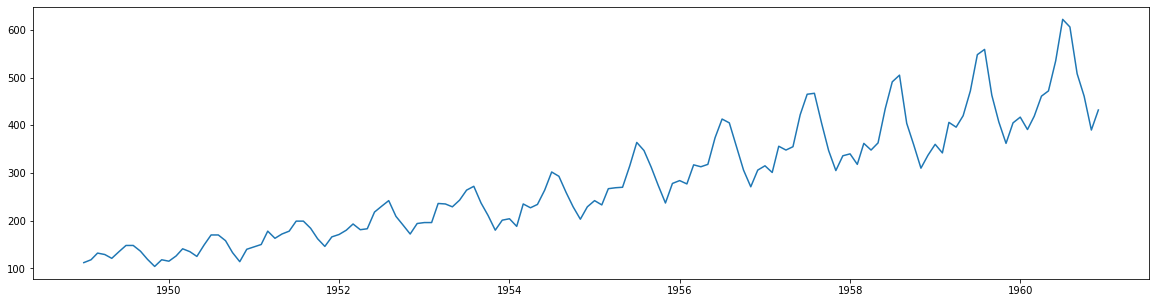

In [13]:
# Airline Passengers dataset -- Non-Stationary

passengers_data = pd.read_csv('Airline_Passengers_Dataset.csv', header=0)

passengers_data['Month']=pd.to_datetime(passengers_data['Month'])

X= passengers_data.set_index('Month').values

split = int(len(X) / 2)

X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

plt.figure(figsize=(20,5))

plt.plot(passengers_data['Month'],passengers_data['Passengers'])


In [14]:
import numpy.ma as ma

from statsmodels.tsa.stattools import acf,pacf

X= passengers_data.set_index('Month')
ma.corrcoef(ma.masked_invalid(X['Passengers'].shift(1)),X['Passengers'])

masked_array(
  data=[[1.0, 0.9601946480498527],
        [0.9601946480498527, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [15]:
# Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(passengers_data['Passengers'])

test_result


print("p_value of test is %f" % test_result[1])


p_value of test is 0.991880


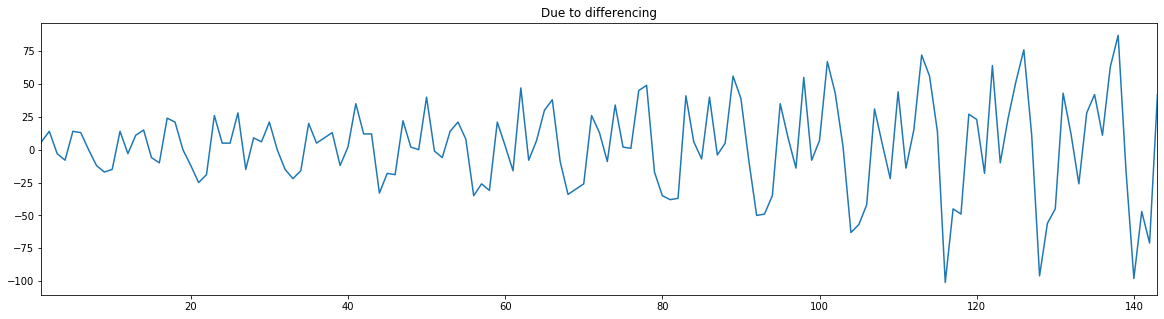

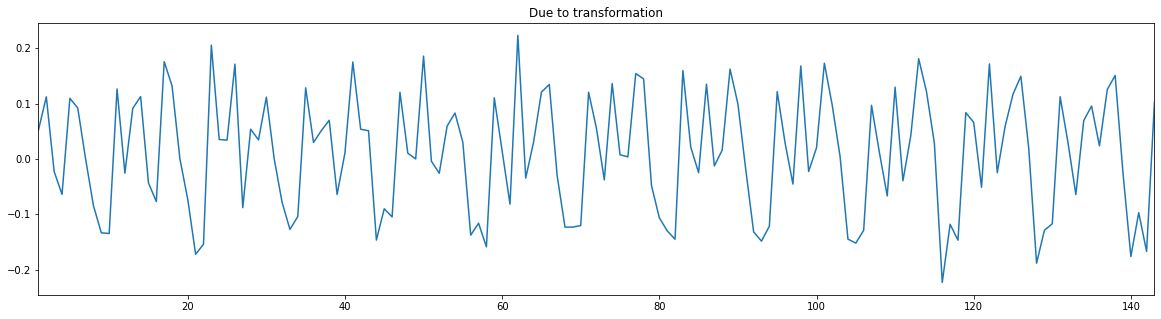

In [16]:
# Making a time series stationary

#1. Differencing

passengers_data['#Passengers_dif'] = passengers_data['Passengers'] - passengers_data['Passengers'].shift(1)
plt.figure(figsize=(20,5))
passengers_data['#Passengers_dif'].dropna().plot()
plt.title('Due to differencing')
plt.show()

#2. Transformations

passengers_data['#Passengers_log'] = np.log(passengers_data['Passengers'])
passengers_data['#Passengers_log_dif'] = passengers_data['#Passengers_log'] - passengers_data['#Passengers_log'].shift(1)
passengers_data['#Passengers_log_dif'].dropna().plot()
plt.title("Due to transformation")
plt.show()


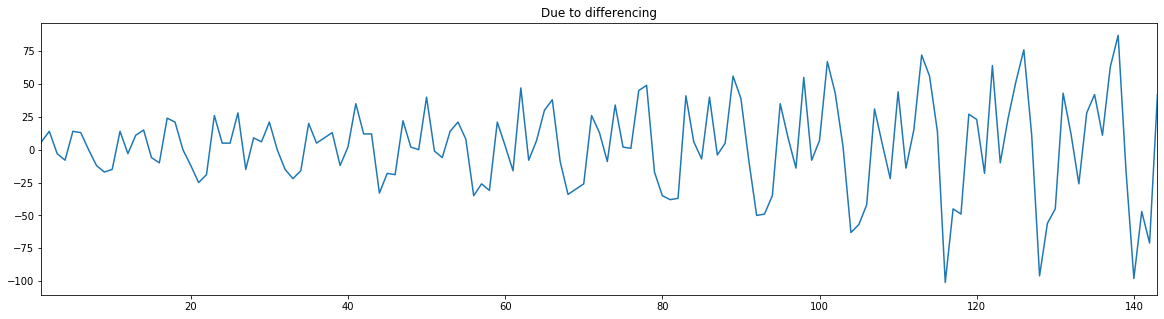

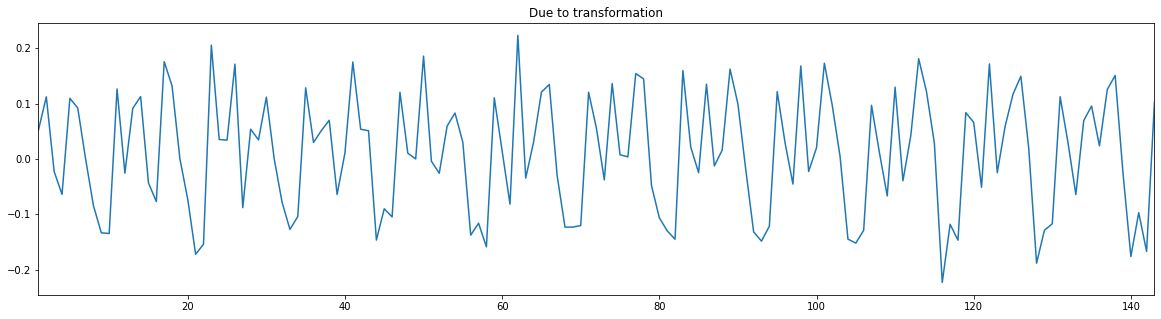

In [17]:
# Making a time series stationary

#1. Differencing

passengers_data['#Passengers_dif'] = passengers_data['Passengers'] - passengers_data['Passengers'].shift(1)
plt.figure(figsize=(20,5))
passengers_data['#Passengers_dif'].dropna().plot()
plt.title('Due to differencing')
plt.show()

#2. Transformations

passengers_data['#Passengers_log'] = np.log(passengers_data['Passengers'])
passengers_data['#Passengers_log_dif'] = passengers_data['#Passengers_log'] - passengers_data['#Passengers_log'].shift(1)
passengers_data['#Passengers_log_dif'].dropna().plot()
plt.title("Due to transformation")
plt.show()


In [23]:
# ARIMA Model
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(passengers_data['#Passengers_log_dif'], nlags=20)



#lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols'))